In [52]:
#options(scipen = 2)

In [2]:
library(stringr)
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.5.0     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ forcats 1.0.0
✔ readr   2.1.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
library(scales)
library(vroom)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘vroom’


The following object is masked from ‘package:scales’:

    col_factor


The following objects are masked from ‘package:readr’:

    as.col_spec, col_character, col_date, col_datetime, col_double,
    col_factor, col_guess, col_integer, col_logical, col_number,
    col_skip, col_time, cols, cols_condense, cols_only, date_names,
    date_names_lang, date_names_langs, default_locale, fwf_cols,
    fwf_empty, fwf_positions, fwf_widths, locale, output_column,
    problems, spec




In [4]:
setwd("/path/to/caQTL/stuff/compare")

# Map SNPs to hg38 - Only need to do this once

In [5]:
#kha = read.table('../../221202_WE_caQTLs/compare/khetan_etal_caQTLs.txt', header=T)
#
#dim(kha)
#head(kha)

In [7]:
#length(kha$Feature_Coordinates)
#length(unique(kha$Feature_Coordinates))

[1] 2949

[1] 2948

In [8]:
#kha$SNP_hg19 <- paste0('chr',kha$Chromosome, ":", kha$SNP_Position, ":",
#                      kha$Ref,":",kha$Alt)
#kha$SNP_hg19_flip <- paste0('chr',kha$Chromosome, ":", kha$SNP_Position, ":",
#                      kha$Alt,":",kha$Ref)
#
#dim(kha)
#head(kha)

[1] 2949   26

,rsID,Feature_Coordinates,Chromosome,SNP_Position,Ref,Alt,AlelleFreq,HWE_ChiSq,IA,Log10_BH,⋯,Num_fSNPs,Num_testedSNPs,LogLike_Null,ConvergenenceStatus,SqCor_fSNPs,SqCor_rSNPs,PValue,Bonferroni_Corrected_Pvalue_10._FDR_Cutoff_0.02276441.,SNP_hg19,SNP_hg19_flip
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,rs9274652,6:32636138-32636402,6,32636235,C,T,0.289474,0.436180,0.990341,0.990341,⋯,23,21,13.01926,0,0.945687,0.901156,0.000000000000000000000000000943,0.0000000000000000000000000198,chr6:32636235:C:T,chr6:32636235:T:C
2,rs6547757,2:88469578-88470466,2,88469770,G,C,0.815789,0.968783,0.972670,0.972670,⋯,6,7,27.65542,0,0.988809,0.954547,0.000000000000000000017900000000,0.0000000000000000001250000000,chr2:88469770:G:C,chr2:88469770:C:G
3,rs2517198,8:17465473-17466680,8,17465824,C,T,0.736842,0.139592,1.000000,1.000000,⋯,22,16,21.20592,0,0.983474,0.850832,0.000000000000000000184000000000,0.0000000000000000029400000000,chr8:17465824:C:T,chr8:17465824:T:C
4,rs6838211,4:178643909-178644842,4,178644629,A,C,0.342105,1.555796,0.999883,0.999883,⋯,5,4,27.84253,0,0.995858,0.993223,0.000000000000000000970000000000,0.0000000000000000038800000000,chr4:178644629:A:C,chr4:178644629:C:A
5,rs370140,9:10208009-10209073,9,10208378,G,T,0.684211,0.012492,0.851859,0.851859,⋯,15,13,22.21145,0,0.902845,0.765931,0.000000000000000000362000000000,0.0000000000000000047000000000,chr9:10208378:G:T,chr9:10208378:T:G
6,rs565888125,6:29920775-29921237,6,29920909,G,A,0.684211,4.047337,0.937237,0.937237,⋯,35,39,10.80162,0,0.890586,0.689032,0.000000000000000063700000000000,0.0000000000000024800000000000,chr6:29920909:G:A,chr6:29920909:A:G


In [ ]:
gc()

In [16]:
#snp_map <- data.frame()
#
#for (i in 22:1) {
#    chr_snp_map <- vroom(paste0('/data/dbSNP_156/dbSNP_156_hg19_hg38.rsid.',i,'.map.gz'))
#    
#    chr_snp_map$Ref_hg19 <- str_split(chr_snp_map$SNP_hg19, ":", simplify=T)[,3]
#    chr_snp_map$Alt_hg19 <- str_split(chr_snp_map$SNP_hg19, ":", simplify=T)[,4]
#    chr_snp_map$Ref_hg38 <- str_split(chr_snp_map$SNP_hg38, ":", simplify=T)[,3]
#    chr_snp_map$Alt_hg38 <- str_split(chr_snp_map$SNP_hg38, ":", simplify=T)[,4]
#        
#    chr_snp_map_allele_match <- chr_snp_map[(chr_snp_map$Ref_hg19 == chr_snp_map$Ref_hg38) & (chr_snp_map$Alt_hg19 == chr_snp_map$Alt_hg38),]
#    chr_snp_map_allele_match <- chr_snp_map_allele_match[!duplicated(chr_snp_map_allele_match$SNP_hg19) & !duplicated(chr_snp_map_allele_match$SNP_hg38),]
#    
#    gc()
#    
#    chr_snp_map_allele_match <- chr_snp_map_allele_match[!duplicated(chr_snp_map_allele_match$SNP_hg19) & !duplicated(chr_snp_map_allele_match$SNP_hg38),]
#    kha_chr_filt <- filter(kha, Chromosome==i & SNP_hg19 %in% filter(chr_snp_map_allele_match, SNP_hg19%in% c(kha$SNP_hg19, kha$SNP_hg19_flip))$SNP_hg19)
#    chr_snp_map_allele_match_filt <- filter(chr_snp_map_allele_match, SNP_hg19 %in% kha$SNP_hg19 | SNP_hg19 %in% kha$SNP_hg19_flip)
#    
#    kha_chr_filt <- arrange(kha_chr_filt, SNP_hg19)
#    chr_snp_map_allele_match_filt <- arrange(chr_snp_map_allele_match_filt, SNP_hg19)
#    
#    print(paste0("Chromosome: ",i))
#    print(paste0("Starting: ",nrow(kha_chr_filt)))
#    print(paste0("Matched: ",nrow(kha_chr_filt)))
#    print(paste0("Unmatched: ",nrow(filter(kha, Chromosome==i & !(SNP_hg19 %in% filter(chr_snp_map_allele_match, SNP_hg19%in% c(kha$SNP_hg19, kha$SNP_hg19_flip))$SNP_hg19)))))
#    print(paste0('Double Check Row Order: ', sum(kha_chr_filt$SNP_hg19 == chr_snp_map_allele_match_filt$SNP_hg19)))
#    print('\n')
#    
#    kha_hg38 <- left_join(kha_chr_filt, chr_snp_map_allele_match_filt)
#    
#    snp_map <- rbind(snp_map, kha_hg38)
#}
#
#dim(snp_map)
#head(snp_map)

[1] "Chromosome: 22"
[1] "Starting: 23"
[1] "Matched: 23"
[1] "Unmatched: 3"
[1] "Double Check Row Order: 23"
[1] "\n"


Joining with `by = join_by(SNP_hg19)`
Rows: 26376296 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): rsid, SNP_hg19, SNP_hg38

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Chromosome: 21"
[1] "Starting: 47"
[1] "Matched: 47"
[1] "Unmatched: 0"


Warning message in kha_chr_filt$SNP_hg19 == chr_snp_map_allele_match_filt$SNP_hg19:
“longer object length is not a multiple of shorter object length”


[1] "Double Check Row Order: 32"
[1] "\n"


Joining with `by = join_by(SNP_hg19)`
Rows: 42970229 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): rsid, SNP_hg19, SNP_hg38

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Chromosome: 20"
[1] "Starting: 32"
[1] "Matched: 32"
[1] "Unmatched: 2"


Warning message in kha_chr_filt$SNP_hg19 == chr_snp_map_allele_match_filt$SNP_hg19:
“longer object length is not a multiple of shorter object length”


[1] "Double Check Row Order: 6"
[1] "\n"


Joining with `by = join_by(SNP_hg19)`
Rows: 45819732 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): rsid, SNP_hg19, SNP_hg38

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Chromosome: 19"
[1] "Starting: 34"
[1] "Matched: 34"
[1] "Unmatched: 1"
[1] "Double Check Row Order: 34"
[1] "\n"


Joining with `by = join_by(SNP_hg19)`
Rows: 52317845 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): rsid, SNP_hg19, SNP_hg38

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Chromosome: 18"
[1] "Starting: 121"
[1] "Matched: 121"
[1] "Unmatched: 4"


Warning message in kha_chr_filt$SNP_hg19 == chr_snp_map_allele_match_filt$SNP_hg19:
“longer object length is not a multiple of shorter object length”


[1] "Double Check Row Order: 7"
[1] "\n"


Joining with `by = join_by(SNP_hg19)`
Rows: 57145274 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): rsid, SNP_hg19, SNP_hg38

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Chromosome: 17"
[1] "Starting: 40"
[1] "Matched: 40"
[1] "Unmatched: 2"


Warning message in kha_chr_filt$SNP_hg19 == chr_snp_map_allele_match_filt$SNP_hg19:
“longer object length is not a multiple of shorter object length”


[1] "Double Check Row Order: 13"
[1] "\n"


Joining with `by = join_by(SNP_hg19)`
Rows: 65412116 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): rsid, SNP_hg19, SNP_hg38

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Chromosome: 16"
[1] "Starting: 28"
[1] "Matched: 28"
[1] "Unmatched: 2"


Warning message in kha_chr_filt$SNP_hg19 == chr_snp_map_allele_match_filt$SNP_hg19:
“longer object length is not a multiple of shorter object length”


[1] "Double Check Row Order: 12"
[1] "\n"


Joining with `by = join_by(SNP_hg19)`
Rows: 57504806 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): rsid, SNP_hg19, SNP_hg38

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Chromosome: 15"
[1] "Starting: 44"
[1] "Matched: 44"
[1] "Unmatched: 1"
[1] "Double Check Row Order: 44"
[1] "\n"


Joining with `by = join_by(SNP_hg19)`
Rows: 60839296 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): rsid, SNP_hg19, SNP_hg38

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Chromosome: 14"
[1] "Starting: 87"
[1] "Matched: 87"
[1] "Unmatched: 4"


Warning message in kha_chr_filt$SNP_hg19 == chr_snp_map_allele_match_filt$SNP_hg19:
“longer object length is not a multiple of shorter object length”


[1] "Double Check Row Order: 5"
[1] "\n"


Joining with `by = join_by(SNP_hg19)`
Rows: 66686454 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): rsid, SNP_hg19, SNP_hg38

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Chromosome: 13"
[1] "Starting: 113"
[1] "Matched: 113"
[1] "Unmatched: 4"


Warning message in kha_chr_filt$SNP_hg19 == chr_snp_map_allele_match_filt$SNP_hg19:
“longer object length is not a multiple of shorter object length”


[1] "Double Check Row Order: 80"
[1] "\n"


Joining with `by = join_by(SNP_hg19)`
Rows: 90714457 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): rsid, SNP_hg19, SNP_hg38

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Chromosome: 12"
[1] "Starting: 166"
[1] "Matched: 166"
[1] "Unmatched: 5"


Warning message in kha_chr_filt$SNP_hg19 == chr_snp_map_allele_match_filt$SNP_hg19:
“longer object length is not a multiple of shorter object length”


[1] "Double Check Row Order: 13"
[1] "\n"


Joining with `by = join_by(SNP_hg19)`
Rows: 92608647 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): rsid, SNP_hg19, SNP_hg38

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Chromosome: 11"
[1] "Starting: 143"
[1] "Matched: 143"
[1] "Unmatched: 5"


Warning message in kha_chr_filt$SNP_hg19 == chr_snp_map_allele_match_filt$SNP_hg19:
“longer object length is not a multiple of shorter object length”


[1] "Double Check Row Order: 30"
[1] "\n"


Joining with `by = join_by(SNP_hg19)`
Rows: 91456428 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): rsid, SNP_hg19, SNP_hg38

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Chromosome: 10"
[1] "Starting: 133"
[1] "Matched: 133"
[1] "Unmatched: 3"
[1] "Double Check Row Order: 133"
[1] "\n"


Joining with `by = join_by(SNP_hg19)`
Rows: 87459201 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): rsid, SNP_hg19, SNP_hg38

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Chromosome: 9"
[1] "Starting: 131"
[1] "Matched: 131"
[1] "Unmatched: 2"


Warning message in kha_chr_filt$SNP_hg19 == chr_snp_map_allele_match_filt$SNP_hg19:
“longer object length is not a multiple of shorter object length”


[1] "Double Check Row Order: 9"
[1] "\n"


Joining with `by = join_by(SNP_hg19)`


[1] "Chromosome: 8"
[1] "Starting: 187"
[1] "Matched: 187"
[1] "Unmatched: 4"


Warning message in kha_chr_filt$SNP_hg19 == chr_snp_map_allele_match_filt$SNP_hg19:
“longer object length is not a multiple of shorter object length”


[1] "Double Check Row Order: 43"
[1] "\n"


Joining with `by = join_by(SNP_hg19)`
Rows: 110313497 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): rsid, SNP_hg19, SNP_hg38

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Chromosome: 7"
[1] "Starting: 205"
[1] "Matched: 205"
[1] "Unmatched: 7"


Warning message in kha_chr_filt$SNP_hg19 == chr_snp_map_allele_match_filt$SNP_hg19:
“longer object length is not a multiple of shorter object length”


[1] "Double Check Row Order: 119"
[1] "\n"


Joining with `by = join_by(SNP_hg19)`
Rows: 113039848 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): rsid, SNP_hg19, SNP_hg38

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Chromosome: 6"
[1] "Starting: 215"
[1] "Matched: 215"
[1] "Unmatched: 5"


Warning message in kha_chr_filt$SNP_hg19 == chr_snp_map_allele_match_filt$SNP_hg19:
“longer object length is not a multiple of shorter object length”


[1] "Double Check Row Order: 28"
[1] "\n"


Joining with `by = join_by(SNP_hg19)`
Rows: 120101768 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): rsid, SNP_hg19, SNP_hg38

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Chromosome: 5"
[1] "Starting: 211"
[1] "Matched: 211"
[1] "Unmatched: 0"


Warning message in kha_chr_filt$SNP_hg19 == chr_snp_map_allele_match_filt$SNP_hg19:
“longer object length is not a multiple of shorter object length”


[1] "Double Check Row Order: 201"
[1] "\n"


Joining with `by = join_by(SNP_hg19)`
Rows: 128732336 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): rsid, SNP_hg19, SNP_hg38

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Chromosome: 4"
[1] "Starting: 232"
[1] "Matched: 232"
[1] "Unmatched: 3"
[1] "Double Check Row Order: 232"
[1] "\n"


Joining with `by = join_by(SNP_hg19)`
Rows: 133563446 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): rsid, SNP_hg19, SNP_hg38

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Chromosome: 3"
[1] "Starting: 229"
[1] "Matched: 229"
[1] "Unmatched: 8"


Warning message in kha_chr_filt$SNP_hg19 == chr_snp_map_allele_match_filt$SNP_hg19:
“longer object length is not a multiple of shorter object length”


[1] "Double Check Row Order: 57"
[1] "\n"


Joining with `by = join_by(SNP_hg19)`
Rows: 163775952 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): rsid, SNP_hg19, SNP_hg38

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Chromosome: 2"
[1] "Starting: 257"
[1] "Matched: 257"
[1] "Unmatched: 8"


Warning message in kha_chr_filt$SNP_hg19 == chr_snp_map_allele_match_filt$SNP_hg19:
“longer object length is not a multiple of shorter object length”


[1] "Double Check Row Order: 80"
[1] "\n"


Joining with `by = join_by(SNP_hg19)`
Rows: 154751412 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): rsid, SNP_hg19, SNP_hg38

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Chromosome: 1"
[1] "Starting: 190"
[1] "Matched: 190"
[1] "Unmatched: 8"


Warning message in kha_chr_filt$SNP_hg19 == chr_snp_map_allele_match_filt$SNP_hg19:
“longer object length is not a multiple of shorter object length”


[1] "Double Check Row Order: 160"
[1] "\n"


Joining with `by = join_by(SNP_hg19)`


[1] 2868   32

,rsID,Feature_Coordinates,Chromosome,SNP_Position,Ref,Alt,AlelleFreq,HWE_ChiSq,IA,Log10_BH,⋯,PValue,Bonferroni_Corrected_Pvalue_10._FDR_Cutoff_0.02276441.,SNP_hg19,SNP_hg19_flip,rsid,SNP_hg38,Ref_hg19,Alt_hg19,Ref_hg38,Alt_hg38
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,rs17807317,22:17680208-17680549,22,17680519,A,C,0.421053,2.357825,0.998926,0.998926,⋯,0.002506381,0.002506381,chr22:17680519:A:C,chr22:17680519:C:A,rs17807317,chr22:17199629:A:C,A,C,A,C
2,rs1110477,22:19962018-19962579,22,19962380,C,T,0.842105,0.824653,1.000000,1.000000,⋯,0.007089506,0.014179012,chr22:19962380:C:T,chr22:19962380:T:C,rs1110477,chr22:19974857:C:T,C,T,C,T
3,rs1153418,22:20161232-20161664,22,20161424,T,C,0.315789,0.012492,0.989113,0.989113,⋯,0.004400996,0.017603983,chr22:20161424:T:C,chr22:20161424:C:T,rs1153418,chr22:20173901:T:C,T,C,T,C
4,rs654389,22:20193826-20194241,22,20193861,G,C,0.421053,0.120222,0.977179,0.977179,⋯,0.018016291,0.018016291,chr22:20193861:G:C,chr22:20193861:C:G,rs654389,chr22:20206338:G:C,G,C,G,C
5,rs165912,22:21131847-21132467,22,21132154,C,T,0.578947,0.353306,1.000000,1.000000,⋯,0.000069200,0.000069200,chr22:21132154:C:T,chr22:21132154:T:C,rs165912,chr22:20777866:C:T,C,T,C,T
6,rs116962577,22:23610048-23610742,22,23610288,A,C,0.105263,0.262976,0.999721,0.999721,⋯,0.016315668,0.016315668,chr22:23610288:A:C,chr22:23610288:C:A,rs116962577,chr22:23268101:A:C,A,C,A,C


In [31]:
#write.table(snp_map, '/path/to/caQTL/stuff/compare/khetan_etal_caQTLs_hg38SNPS.txt',
#           sep='\t', col.names=T, row.names=T, quote=F)

In [21]:
#chr_snp_map <- NULL
#chr_snp_map_allele_match <- NULL
#chr_snp_map_allele_match_filt <- NULL
#
#gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1272053,68.0,629398307,33613.5,819495711,43765.8
Vcells,539213411,4113.9,5491742376,41898.7,6864677970,52373.4


# Liftover Features to Hg38

In [30]:
# ONLY RUN THIS BLOCK ONCE
#featbed = data.frame(str_split_fixed(snp_map$Feature_Coordinates, ":|-",3))
#colnames(featbed) <- c("Chromosome", "Start", "End")
#featbed$Chromosome <- paste0('chr', featbed$Chromosome)
#write.table(featbed, "feat_coors_hg19.bed", quote=F, col.names=F, row.names=F, sep="\t")
#
##In terminal
##~/liftOver/liftOver /path/to/caQTL/stuff/compare/feat_coors_hg19.bed /reference/liftover/hg19ToHg38.over.chain.gz /path/to/caQTL/stuff/compare/feat_coors_hg38.bed /path/to/caQTL/stuff/compare/unlifted_feat.bed

In [53]:
#nfeat = read.table('feat_coors_hg38.bed')
#snp_map$feature_hg38 = paste0(nfeat[,1], ":", nfeat[,2],"-",nfeat[,3])
#
#head(snp_map)

In [36]:
#write.table(snp_map, '/path/to/caQTL/stuff/compare/khetan_etal_caQTLs_hg38.txt',
#           sep='\t', col.names=T, row.names=T, quote=F)

# Compare to published bulk

In [69]:
kha <- read.table('/path/to/caQTL/stuff/compare/khetan_etal_caQTLs_hg38.txt',
           sep='\t', header=T)

kha <- select(kha, Khetan.Feature=feature_hg38, rsID=SNP_hg38, Khetan.EffectSize=EffectSize, 
              Khetan.p.value=PValue, Khetan.Bonferroni_Corrected_Pvalue_10._FDR_Cutoff_0.02276441.=Bonferroni_Corrected_Pvalue_10._FDR_Cutoff_0.02276441.,
              Feature_hg19=Feature_Coordinates, rsID.hg19=SNP_hg19)

dim(kha)
head(kha)

[1] 2868    7

,Khetan.Feature,rsID,Khetan.EffectSize,Khetan.p.value,Khetan.Bonferroni_Corrected_Pvalue_10._FDR_Cutoff_0.02276441.,Feature_hg19,rsID.hg19
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,chr22:17199318-17199659,chr22:17199629:A:C,0.646193,0.002506381,0.002506381,22:17680208-17680549,chr22:17680519:A:C
2,chr22:19974495-19975056,chr22:19974857:C:T,0.394771,0.007089506,0.014179012,22:19962018-19962579,chr22:19962380:C:T
3,chr22:20173709-20174141,chr22:20173901:T:C,0.357259,0.004400996,0.017603983,22:20161232-20161664,chr22:20161424:T:C
4,chr22:20206303-20206718,chr22:20206338:G:C,0.608429,0.018016291,0.018016291,22:20193826-20194241,chr22:20193861:G:C
5,chr22:20777559-20778179,chr22:20777866:C:T,0.639069,0.000069200,0.000069200,22:21131847-21132467,chr22:21132154:C:T
6,chr22:23267861-23268555,chr22:23268101:A:C,0.623781,0.016315668,0.016315668,22:23610048-23610742,chr22:23610288:A:C


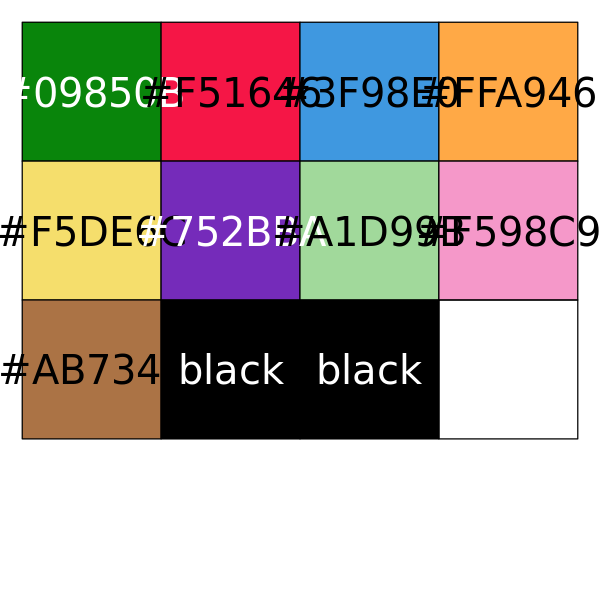

In [308]:
cells =  c('acinar','alpha','beta','delta','ductal',#'endothelial','gamma',
                'gamma','bulk')#,'immune','stellate')
conc_colors = c('acinar'='#09850B', 'alpha'='#F51646', 'beta'='#3F98E0',
                 'delta'='#FFA946', 'ductal'='#F5DE6C', 'endothelial'='#752BBA', 
                 'gamma'='#A1D99B', 'immune'='#F598C9', 'stellate'='#AB7345', 
                'bulk'='black', 'any'='black')
options(repr.plot.width=5, repr.plot.height=5)
scales::show_col(conc_colors, cex_label=2)

Rows: 4388313 Columns: 30
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): Feature, rsID, Chromosome, Ref, Alt
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (3): flag_fdr10, flag_fdr05, flag_fdr01

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining with `by = join_by(Feature)`
Warning message in left_join(myres, intersect):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1589 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship = "many-to-many"` to silence this warning.”
Joining with `by = join_by(rsID, Khetan.Feature)`
Warning message in inner_join(., kha):
“Detected an unexpected many-to-many relationship between `x` and

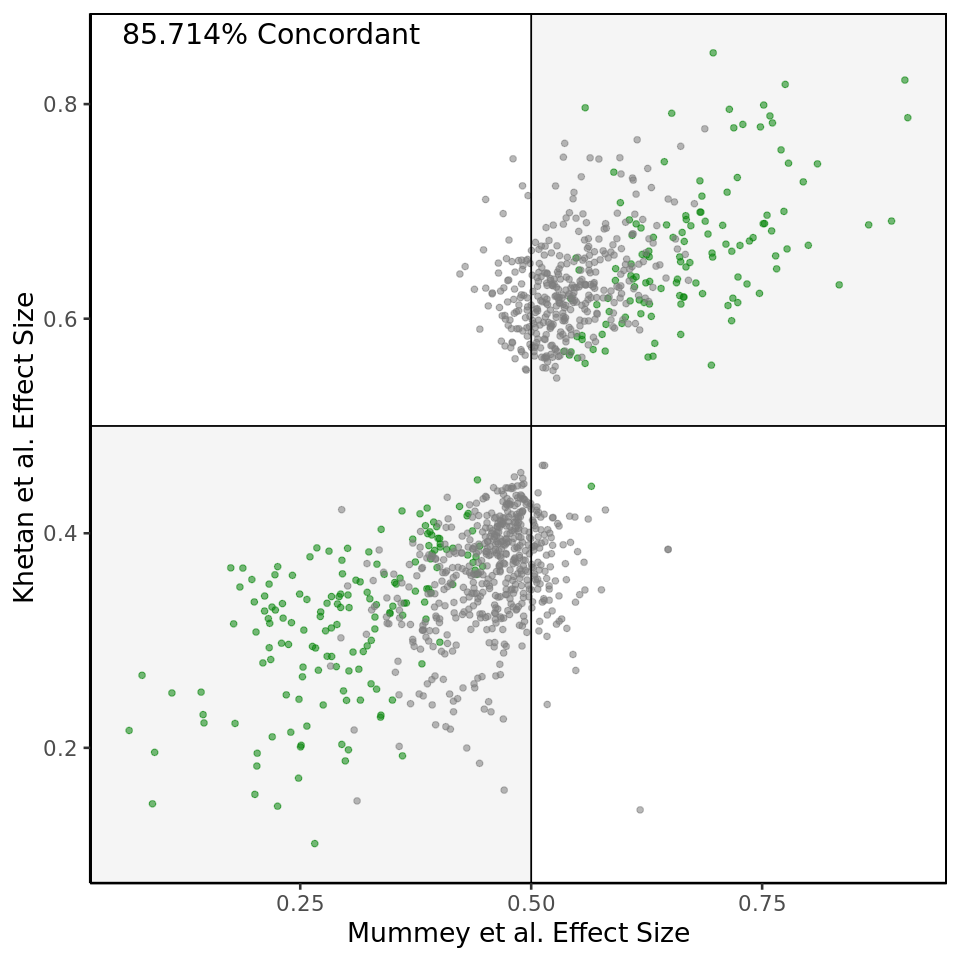

Rows: 3556559 Columns: 30
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): Feature, rsID, Chromosome, Ref, Alt
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (3): flag_fdr10, flag_fdr05, flag_fdr01

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining with `by = join_by(Feature)`
Warning message in left_join(myres, intersect):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 9228 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship = "many-to-many"` to silence this warning.”
Joining with `by = join_by(rsID, Khetan.Feature)`
Warning message in inner_join(., kha):
“Detected an unexpected many-to-many relationship between `x` and

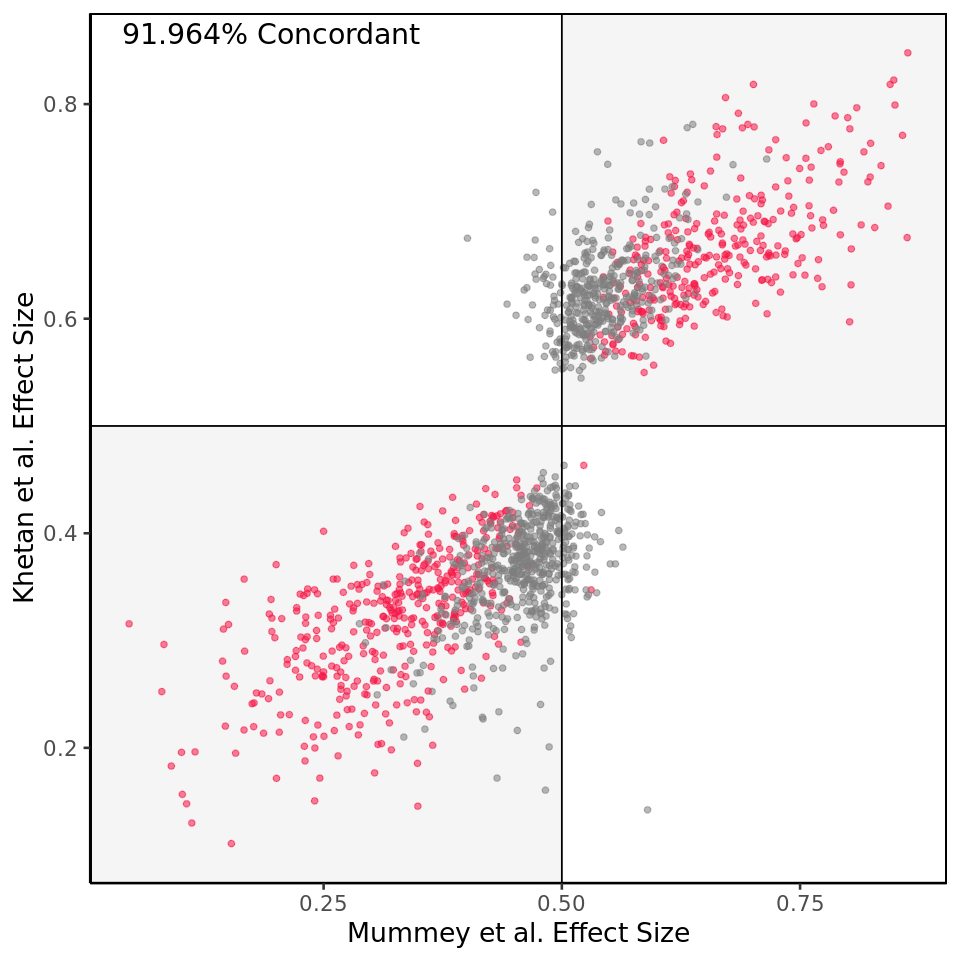

Rows: 2238072 Columns: 30
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): Feature, rsID, Chromosome, Ref, Alt
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (3): flag_fdr10, flag_fdr05, flag_fdr01

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining with `by = join_by(Feature)`
Warning message in left_join(myres, intersect):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 9484 of `x` matches multiple rows in `y`.
ℹ Row 2 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship = "many-to-many"` to silence this warning.”
Joining with `by = join_by(rsID, Khetan.Feature)`


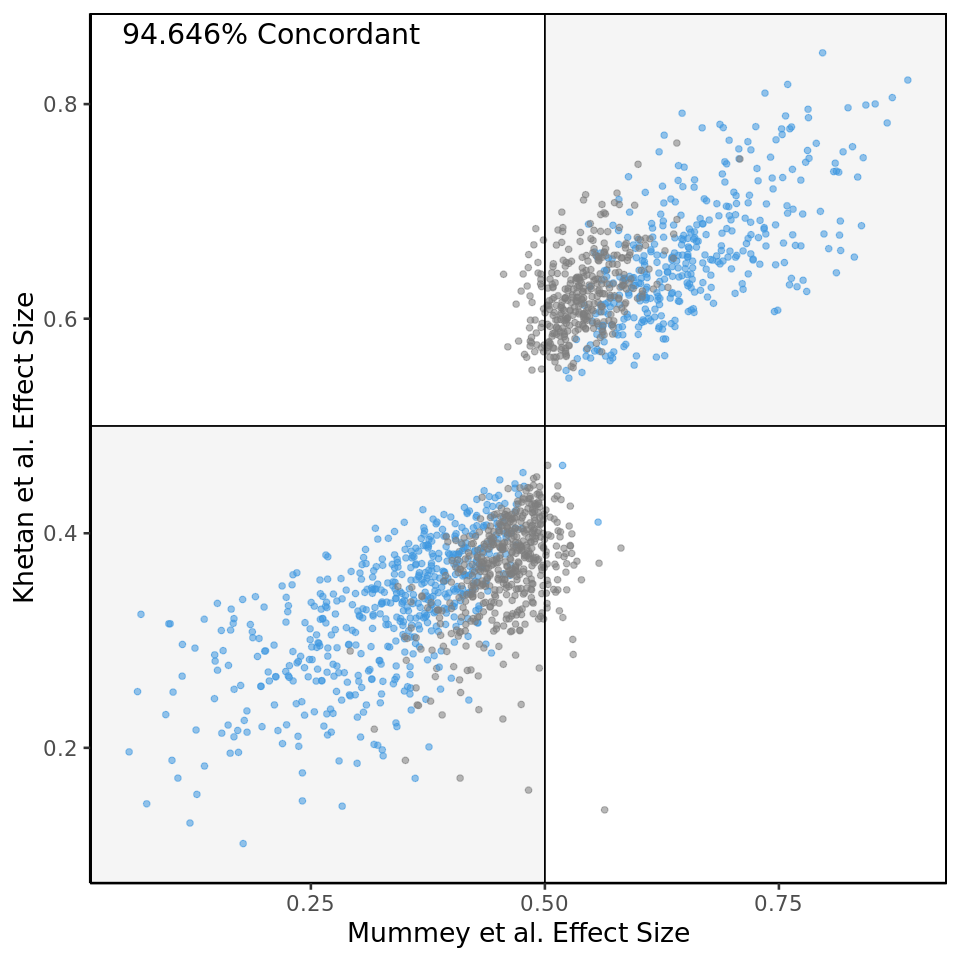

Rows: 2665243 Columns: 30
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): Feature, rsID, Chromosome, Ref, Alt
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (3): flag_fdr10, flag_fdr05, flag_fdr01

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining with `by = join_by(Feature)`
Warning message in left_join(myres, intersect):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 7060 of `x` matches multiple rows in `y`.
ℹ Row 2 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship = "many-to-many"` to silence this warning.”
Joining with `by = join_by(rsID, Khetan.Feature)`
Warning message in inner_join(., kha):
“Detected an unexpected many-to-many relationship between `x` and

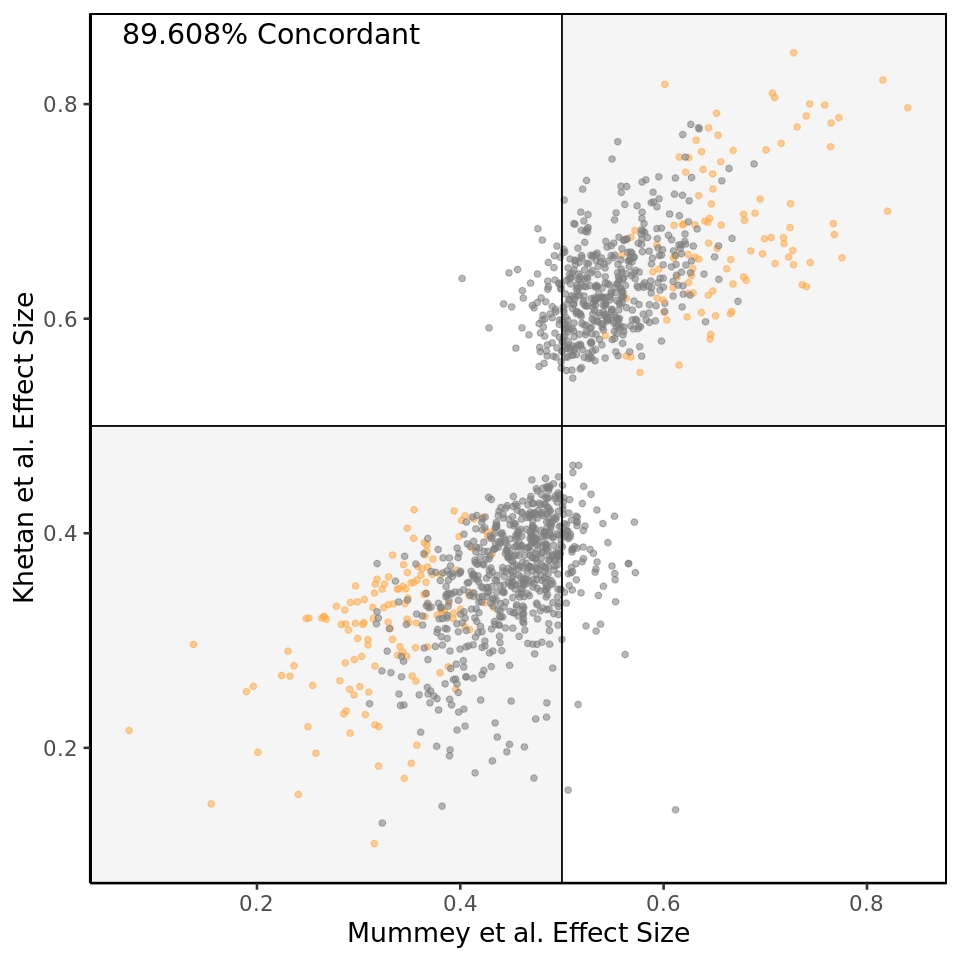

Rows: 11523909 Columns: 30
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): Feature, rsID, Chromosome, Ref, Alt
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (3): flag_fdr10, flag_fdr05, flag_fdr01

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining with `by = join_by(Feature)`
Warning message in left_join(myres, intersect):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 6684 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship = "many-to-many"` to silence this warning.”
Joining with `by = join_by(rsID, Khetan.Feature)`
Warning message in inner_join(., kha):
“Detected an unexpected many-to-many relationship between `x` an

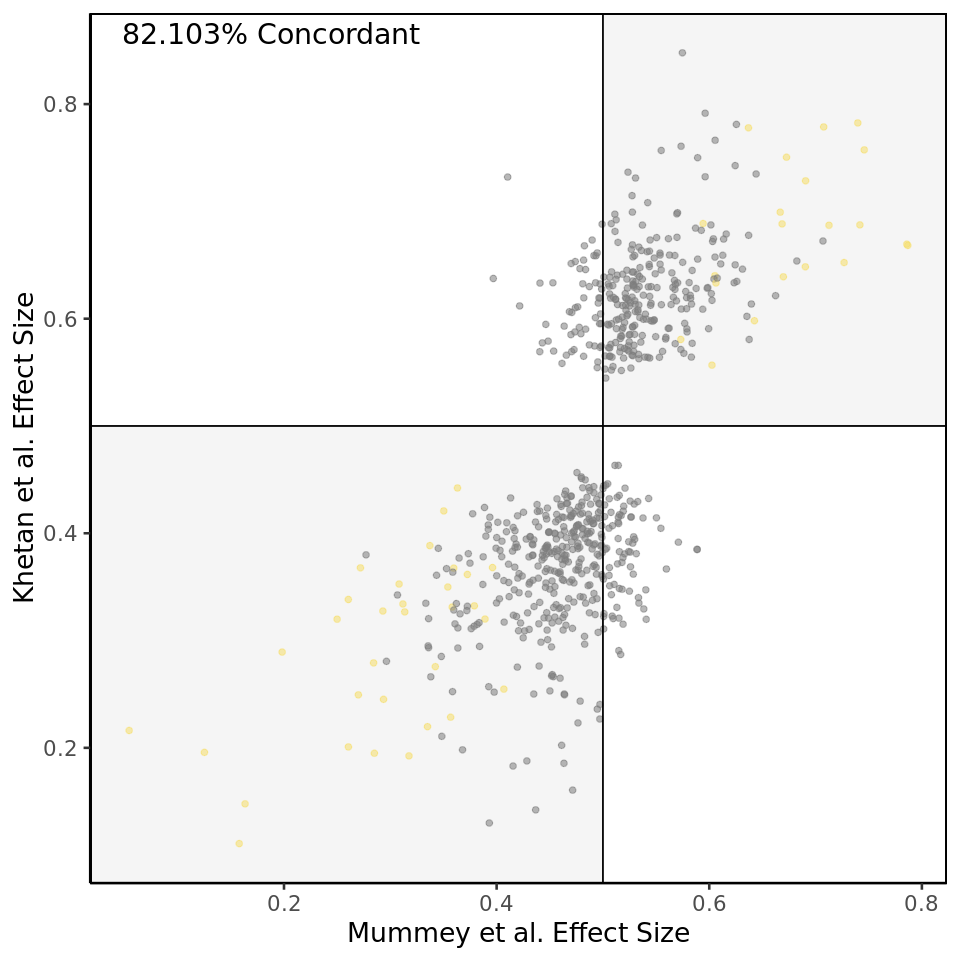

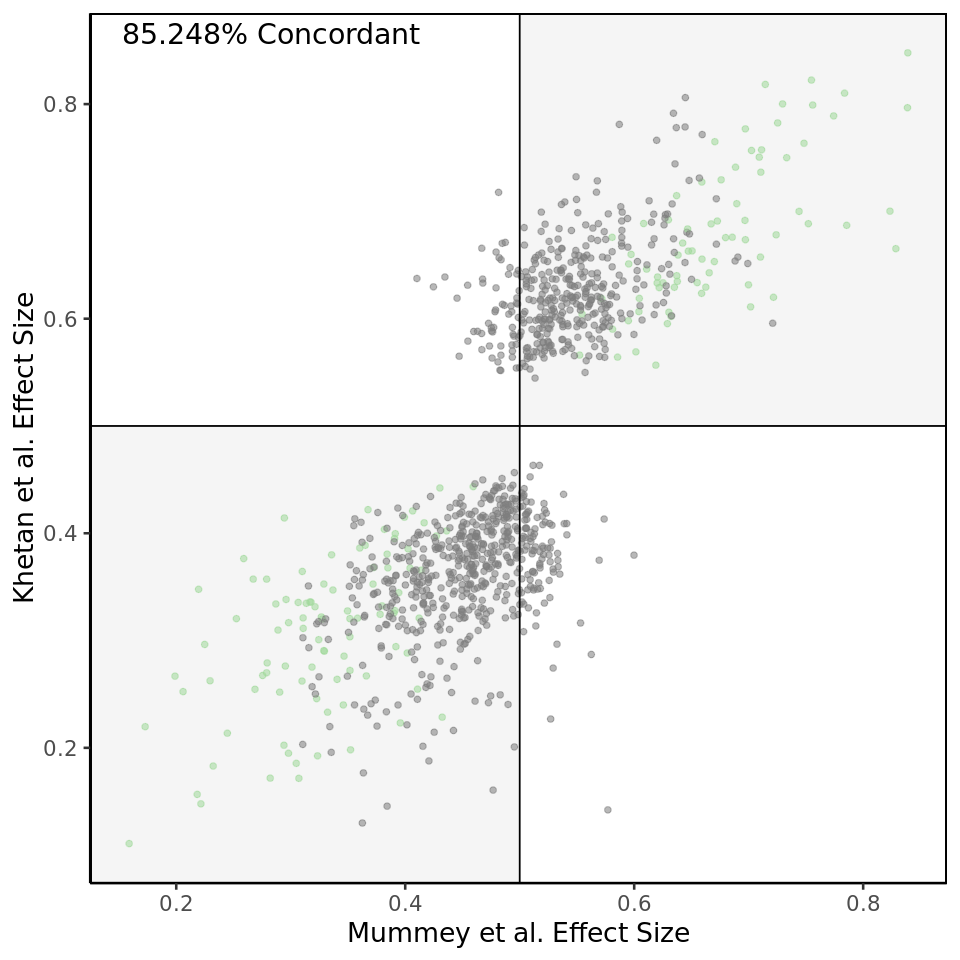

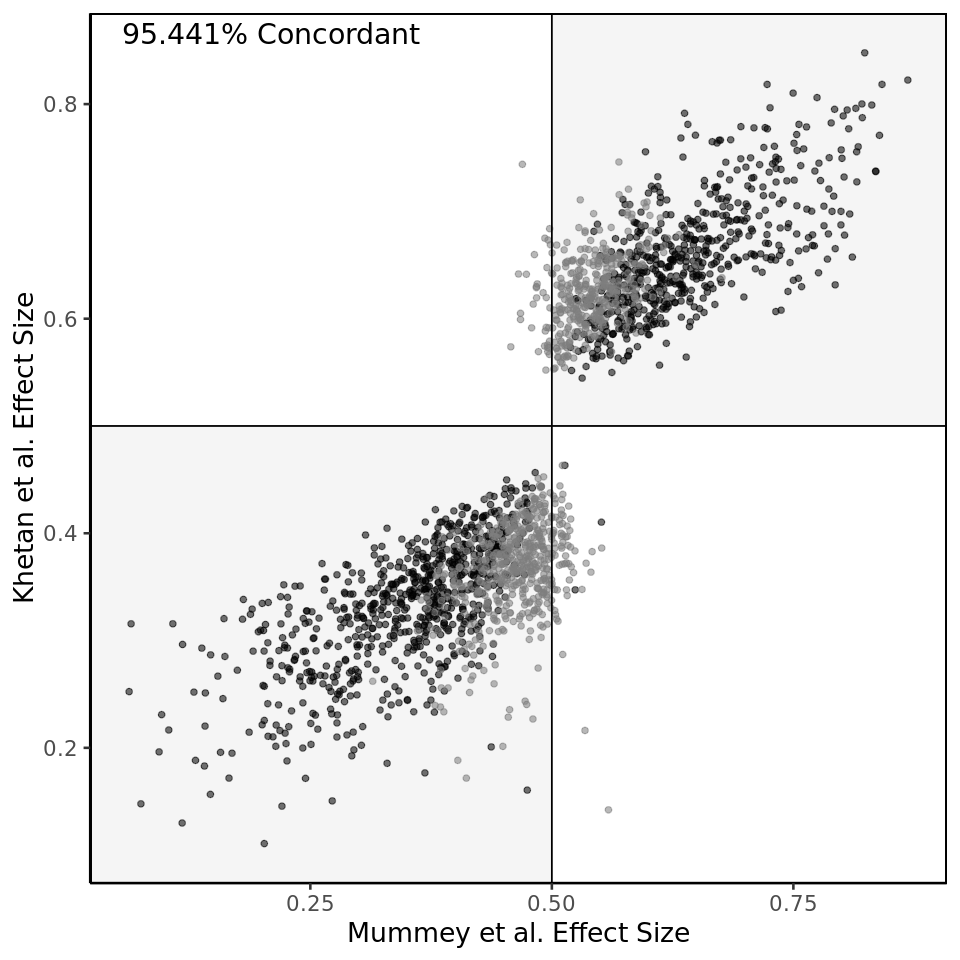

In [199]:
options(repr.plot.width=8, repr.plot.height=8)
for (c in cells) {
    myres = vroom(paste0("../caQTLs_rasqual/", c ,"/run1/Results_run1F_all.tsv"))
    myres <- select(myres, Feature, rsID, Elison.EffectSize=Effect_size, Elison.p.value=P_VAl, Elison.q.val=Log10_qval, flag_fdr05)
    
    out = paste0( c, "_intersected.bed") 
    a   = paste0( c, "_tested_peaks.bed")
    write.table(cbind(str_split_fixed(myres$Feature, ":|-",3),myres$Feature) , a , sep="\t", quote=F, col.names=F, row.names=F)
    system(paste("bedtools intersect -a", a, "-b feat_coors_hg38.bed -wa -wb >", out))
    
    intersect = read.table(out)
    intersect <- intersect[!duplicated(intersect),]
    colnames(intersect) <- c('Elison.Chromosome','Elison.Start','Elison.End','Feature',
                             'Khetan.Chromosome','Khetan.Start','Khetan.End')
    intersect$Khetan.Feature <- paste0(intersect$Khetan.Chromosome, ":", intersect$Khetan.Start, "-", intersect$Khetan.End)
    intersect <- select(intersect, Feature, Khetan.Feature)
    
    merged_data <- left_join(myres, intersect) %>%
        filter(!is.na(Khetan.Feature)) %>%
        inner_join(kha)
    
    merged_data$sig_spec <- ((merged_data$flag_fdr05 * 2) + 
                         (merged_data$Khetan.Bonferroni_Corrected_Pvalue_10._FDR_Cutoff_0.02276441. < 0.02276441))
    
    write.table(merged_data, paste0('/path/to/caQTL/stuff/figures/fp_concordance_published_',
                      c,"_data.tsv"), sep='\t', quote=F, row.names=T, col.names=T)
    
    concordance <- sum((merged_data$Elison.EffectSize > 0.5 & merged_data$Khetan.EffectSize > 0.5) | 
                       (merged_data$Elison.EffectSize < 0.5 & merged_data$Khetan.EffectSize < 0.5)) * 100 / nrow(merged_data)
    p1 <- ggplot(merged_data, aes(x=Elison.EffectSize, y=Khetan.EffectSize, alpha=0.2, color=flag_fdr05)) +
        geom_rect(xmin=-Inf, xmax=0.5, ymin=-Inf, ymax=0.5, fill='gray93', color=NA, alpha=0.05) + 
        geom_rect(xmin=0.5, xmax=Inf, ymin=0.5, ymax=Inf, fill='gray93', color=NA, alpha=0.05) + 
        geom_rect(xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf, color='black', fill=NA) + 
        geom_point() + theme_classic(base_size=16) + geom_vline(xintercept=.5) + geom_hline(yintercept=.5) +
        annotate(geom="text", x=-Inf, y=Inf, size=6,
                 label=paste0("\n\t\t\t\t\t", substring(concordance, 0,6), "% Concordant")) +
        theme(legend.position='none') + ylab("Khetan et al. Effect Size") + xlab("Mummey et al. Effect Size") +
        scale_color_manual(values=c('gray50',unname(major_colors[names(major_colors)==c])))

    p1
    
    print(p1)
}

In [398]:
options(repr.plot.width=8, repr.plot.height=8)
venn.list <- list()

for (c in cells) {
    myres = vroom(paste0("../caQTLs_rasqual/", c ,"/run1/Results_run1F_all.tsv"))
    myres <- select(myres, Feature, rsID, Elison.EffectSize=Effect_size, Elison.p.value=P_VAl, Elison.q.val=Log10_qval, flag_fdr05)
    
    out = paste0( c, "_intersected.bed") 
    a   = paste0( c, "_tested_peaks.bed")
    write.table(cbind(str_split_fixed(myres$Feature, ":|-",3),myres$Feature) , a , sep="\t", quote=F, col.names=F, row.names=F)
    system(paste("bedtools intersect -a", a, "-b feat_coors_hg38.bed -wa -wb >", out))
    
    intersect = read.table(out)
    intersect <- intersect[!duplicated(intersect),]
    colnames(intersect) <- c('Elison.Chromosome','Elison.Start','Elison.End','Feature',
                             'Khetan.Chromosome','Khetan.Start','Khetan.End')
    intersect$Khetan.Feature <- paste0(intersect$Khetan.Chromosome, ":", intersect$Khetan.Start, "-", intersect$Khetan.End)
    intersect <- select(intersect, Feature, Khetan.Feature)
    
    myres_filt <- myres %>%
        group_by(Feature) %>%
        select(flag_fdr05) %>%
        summarise_all(any)
    
    print(sum(sum(myres_filt$flag_fdr05)))
    
    kha.unique <- kha[!duplicated(kha$Khetan.Feature),]
    venn_data <- full_join(filter(myres_filt, flag_fdr05), intersect) %>% #filter(!is.na(Khetan.Feature)) %>%
        full_join(kha.unique, by='Khetan.Feature')
    venn_data <- select(venn_data, Feature, Khetan.Feature, Feature_hg19, flag_fdr05)
    venn_data$fill <- venn_data$Feature
    venn_data[is.na(venn_data$fill),]$fill <- venn_data[is.na(venn_data$fill),]$Khetan.Feature
    
    vd <- VennDiagram::venn.diagram(list(Mummey = venn_data[venn_data$flag_fdr05 & !is.na(venn_data$flag_fdr05),]$fill, 
                               Khetan = venn_data[!is.na(venn_data$Khetan.Feature),]$fill), 
                                category.names = c("Mummey","Khetan"), filename = NULL,
                               fill = c(unname(major_colors[names(major_colors)==c]),'gray50'), alpha=0.2)
    venn.list[[c]] <- vd
}

Rows: 4388313 Columns: 30
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): Feature, rsID, Chromosome, Ref, Alt
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (3): flag_fdr10, flag_fdr05, flag_fdr01

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Adding missing grouping variables: `Feature`


[1] 2144


Joining with `by = join_by(Feature)`
Rows: 4863251 Columns: 30
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): Feature, rsID, Chromosome, Ref, Alt
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (3): flag_fdr10, flag_fdr05, flag_fdr01

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Adding missing grouping variables: `Feature`


[1] 4218


Joining with `by = join_by(Feature)`
Rows: 4797279 Columns: 30
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): Feature, rsID, Chromosome, Ref, Alt
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (3): flag_fdr10, flag_fdr05, flag_fdr01

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Adding missing grouping variables: `Feature`


[1] 5932


Joining with `by = join_by(Feature)`
Rows: 3556559 Columns: 30
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): Feature, rsID, Chromosome, Ref, Alt
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (3): flag_fdr10, flag_fdr05, flag_fdr01

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Adding missing grouping variables: `Feature`


[1] 877


Joining with `by = join_by(Feature)`
Rows: 2238072 Columns: 30
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): Feature, rsID, Chromosome, Ref, Alt
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (3): flag_fdr10, flag_fdr05, flag_fdr01

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Adding missing grouping variables: `Feature`


[1] 267


Joining with `by = join_by(Feature)`
Rows: 2665243 Columns: 30
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): Feature, rsID, Chromosome, Ref, Alt
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (3): flag_fdr10, flag_fdr05, flag_fdr01

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Adding missing grouping variables: `Feature`


[1] 524


Joining with `by = join_by(Feature)`
Rows: 11523909 Columns: 30
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): Feature, rsID, Chromosome, Ref, Alt
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (3): flag_fdr10, flag_fdr05, flag_fdr01

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Adding missing grouping variables: `Feature`


[1] 12217


Joining with `by = join_by(Feature)`
